In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel('Data_Train.xlsx')

In [3]:
df.shape

(10683, 11)

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
print(df.isnull().sum()) #checking for null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [8]:
df=df.dropna()

In [10]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [11]:
print(df.isnull().sum()) #checking for null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [ ]:
#Extracting day,month,year,weekday from Date of Journey

In [13]:
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month
df['weekday']= pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.weekday

In [15]:
df.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

In [18]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'weekday'],
      dtype='object')

In [19]:
#Converting duration into minutes


In [20]:
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
df['Duration']=df['Duration'].apply(duration)

In [21]:
df['Duration'].nunique()

367

In [22]:
#Extracting whether its a morning,evening,night or afternoon flight from departure time & arrival time of the flight



In [23]:
def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
df['Dep_Time']=df['Dep_Time'].apply(deparrtime)
df['Arrival_Time']=df['Arrival_Time'].apply(deparrtime)

In [24]:
#Converting total_stops to 0,1,2,3 and so on..



In [25]:
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        x.strip()
        stps=x.split(' ')[0]
        x=stps
    return x
df['Total_Stops']=df['Total_Stops'].apply(stops)

In [26]:
pd.options.mode.chained_assignment = None 
for i in range(df.shape[0]):
    if(df.iloc[i]['Additional_Info']=='No info'):
        df.iloc[i]['Additional_Info']='No Info' 

In [27]:
df=df.drop(['Route'], axis=1) #we don't need it as we already have total_stops

In [28]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,13302,1,3,4


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Dep_Time         10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Journey_Day      10682 non-null  int64 
 10  Journey_Month    10682 non-null  int64 
 11  weekday          10682 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 1.1+ MB


In [30]:
df["Duration"] = df["Duration"].astype(int)
df["Journey_Day"] = df["Journey_Day"].astype(object)
df["Journey_Month"] = df["Journey_Month"].astype(object)
df["weekday"] = df["weekday"].astype(object)

In [31]:
df["Journey_Month"]=df["Journey_Month"].replace({3:"March",4:"April",5:"May",6:"June"}) #assigning month names


In [32]:
df["Journey_Month"]=df["Journey_Month"].astype(object)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Dep_Time         10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  int64 
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Journey_Day      10682 non-null  object
 10  Journey_Month    10682 non-null  object
 11  weekday          10682 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


EDA

[Text(0, 0, 'March'),
 Text(1, 0, 'May'),
 Text(2, 0, 'June'),
 Text(3, 0, 'April')]

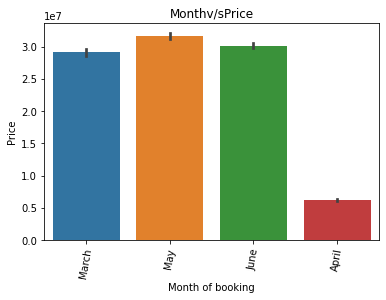

In [34]:
#Journey month v/s total fare
v1=sns.barplot(x='Journey_Month', y='Price', data=df,estimator=sum)
v1.set_title('Monthv/sPrice')
v1.set_ylabel('Price')
v1.set_xlabel('Month of booking')
v1.set_xticklabels(v1.get_xticklabels(), rotation=80)

In [35]:
#count of flights per month
top_month=df.Journey_Month.value_counts().head(10)
top_month

May      3465
June     3414
March    2724
April    1079
Name: Journey_Month, dtype: int64

In [36]:
monthly_avg=df.groupby(['Journey_Month']).agg({'Price':np.mean}).reset_index()

<AxesSubplot:xlabel='Journey_Month'>

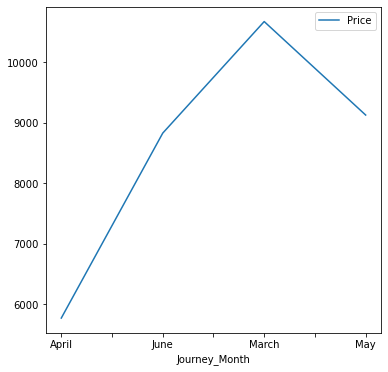

In [37]:
#Journey month v/s Averagefare
monthly_avg.plot(x='Journey_Month',y='Price',figsize=(6,6))


<function matplotlib.pyplot.show(close=None, block=None)>

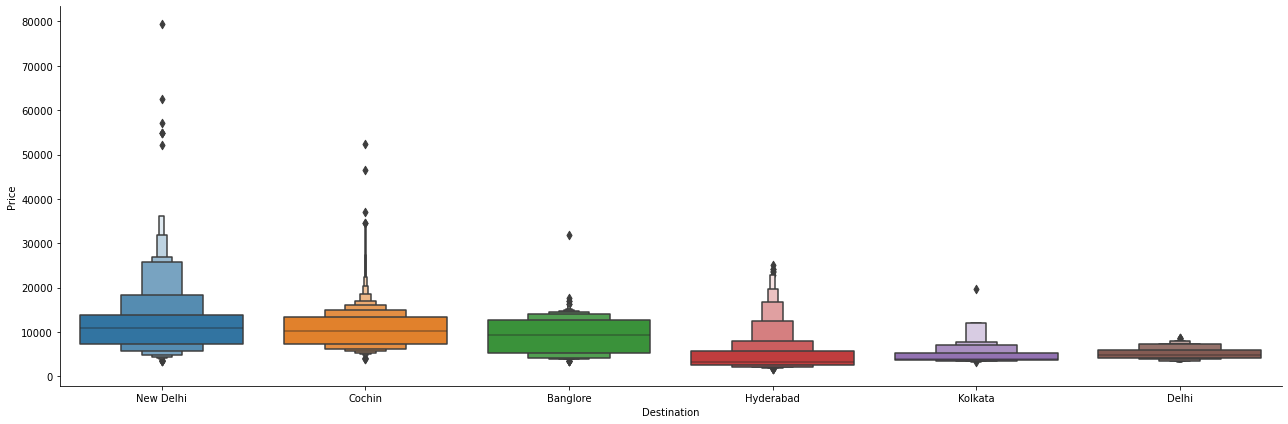

In [38]:
# Destination vs AveragePrice
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

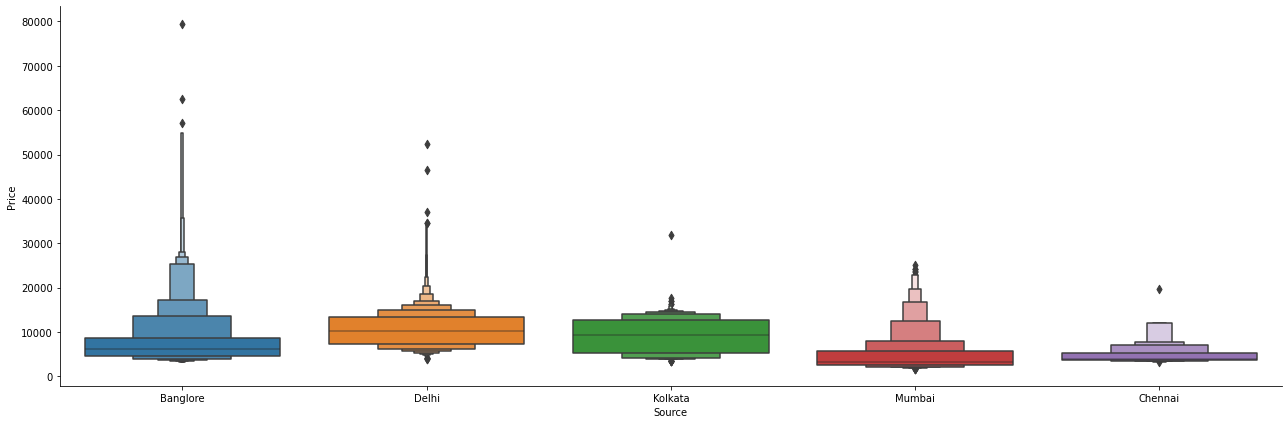

In [39]:
# Source vs AveragePrice
sns.catplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

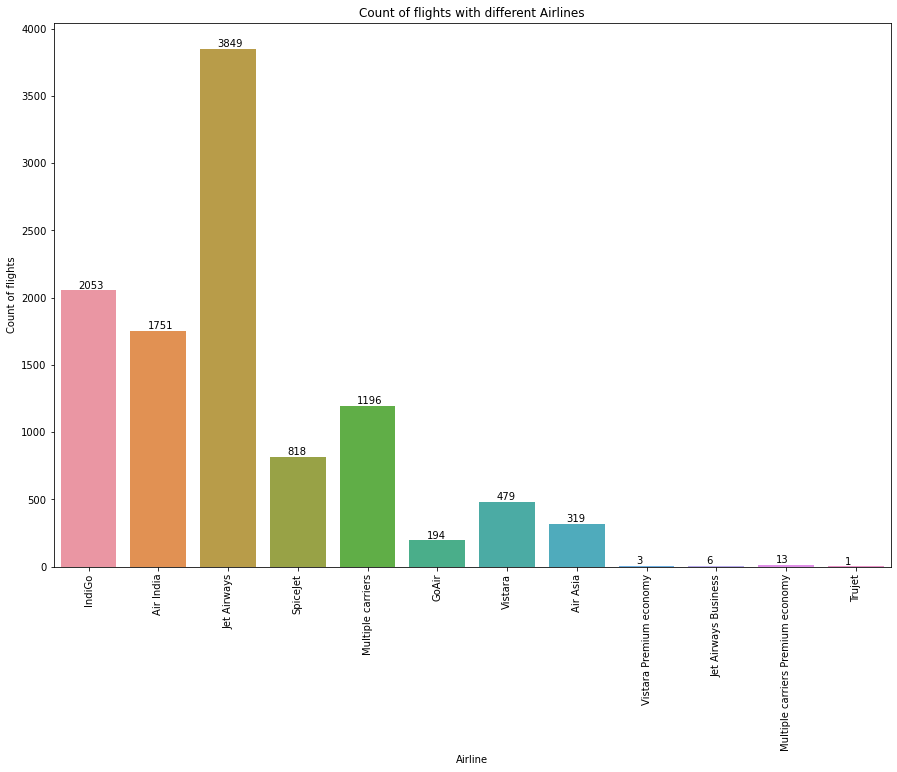

In [40]:
#Count of flights v/s Airline
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

<function matplotlib.pyplot.show(close=None, block=None)>

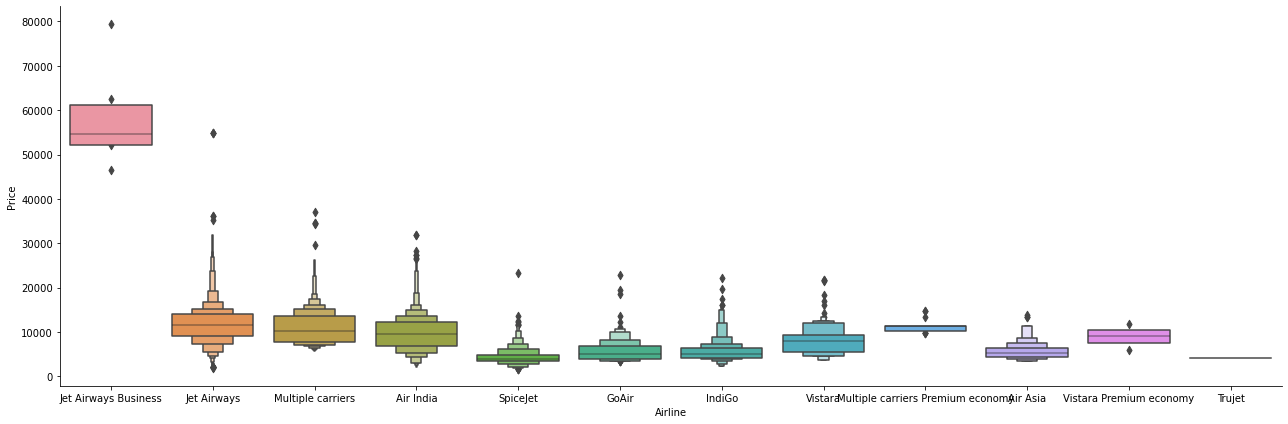

In [41]:
# Airline vs AveragePrice
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

<AxesSubplot:xlabel='Duration', ylabel='Price'>

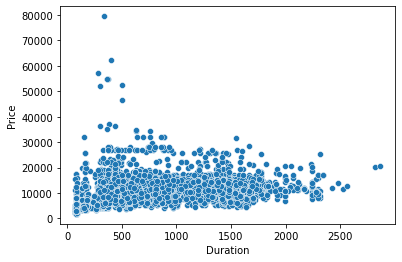

In [42]:
#duration v/s AveragePrice
sns.scatterplot(data=df, x='Duration', y='Price')

[Text(0, 0, 'Night'),
 Text(1, 0, 'Morning'),
 Text(2, 0, 'Evening'),
 Text(3, 0, 'Afternoon')]

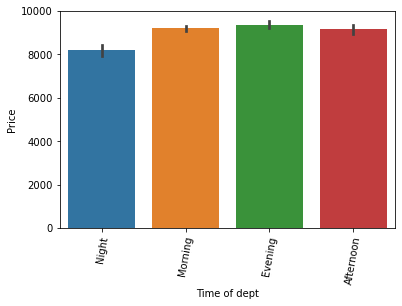

In [43]:
#Deptarure time v/s AveragePrice
v2=sns.barplot(x='Dep_Time', y='Price', data=df)
v2.set_ylabel('Price')
v2.set_xlabel('Time of dept')
v2.set_xticklabels(v2.get_xticklabels(), rotation=80)


In [44]:
# time of departure v/s count of flights
top_time=df.Dep_Time.value_counts().head(10)
top_time

Morning      4331
Evening      2829
Afternoon    2017
Night        1505
Name: Dep_Time, dtype: int64

[Text(0, 0, 'Night'),
 Text(1, 0, 'Afternoon'),
 Text(2, 0, 'Morning'),
 Text(3, 0, 'Evening')]

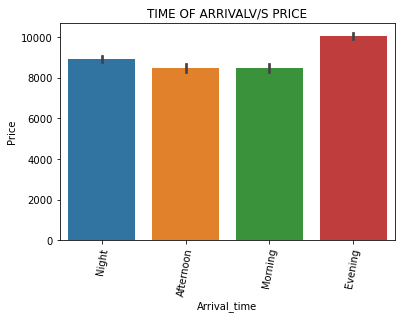

In [45]:
#TIME OF ARRIVAL V/S average price
v3=sns.barplot(x='Arrival_Time', y='Price', data=df)
v3.set_title('TIME OF ARRIVALV/S PRICE')
v3.set_ylabel('Price')
v3.set_xlabel('Arrival_time')
v3.set_xticklabels(v3.get_xticklabels(), rotation=80)

[Text(0, 0, '0'),
 Text(1, 0, '2'),
 Text(2, 0, '1'),
 Text(3, 0, '3'),
 Text(4, 0, '4')]

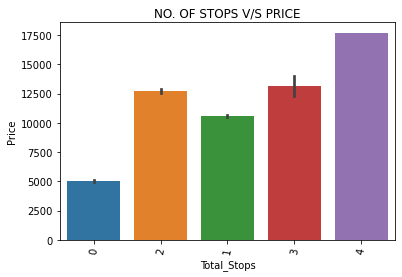

In [46]:
#total stops v/s average price
v4=sns.barplot(x='Total_Stops', y='Price', data=df)
v4.set_title('NO. OF STOPS V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('Total_Stops')
v4.set_xticklabels(v4.get_xticklabels(), rotation=80)


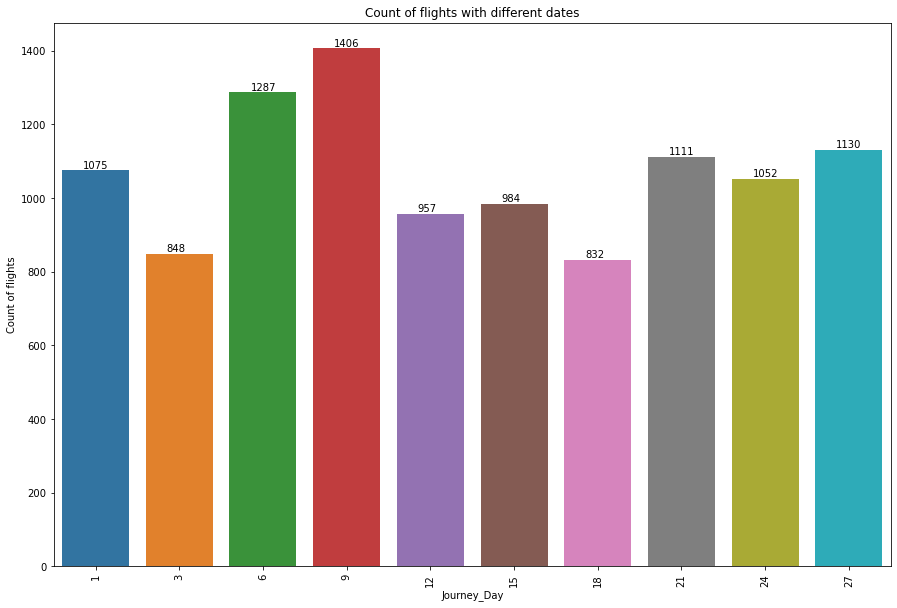

In [47]:
#Count of flights with different dates
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different dates')
ax=sns.countplot(x = 'Journey_Day', data =df)
plt.xlabel('Journey_Day')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')